# MarkMark 

In [1]:
import lltk

In [2]:
# load corpus
C=lltk.load('MarkMark')

In [56]:
# get some basic info
C.info()

[MarkMark]
id: markmark
desc: Mark Algee-Hewitt's and Mark McGurl's 20th Century Corpus
link: --
downloadable: metadata,freqs


## Install

### From pre-compiled zips

Only metadata and 1-gram counts are made available via download.

In [57]:
C.download(parts=['metadata','freqs'], force=False)  # change force to True to redownload

## Preprocess

### Freqs

Only works if you have access to the text files.

In [11]:
# C.preprocess_freqs(force=True)

### Most Frequent Words (MFW)

In [58]:
C.mfw_yearbin=25

In [59]:
# Pre-compute the most frequent words for texts grouped in that yearbin
C.preprocess_mfw(num_proc=4)

Counting most frequent words across groups [x4]: 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]


### DTM

In [55]:
C.preprocess_dtm(n=25000)

Gathering frequencies [x1]: 100%|██████████| 355/355 [00:01<00:00, 231.49it/s]


### Breakdown by year

In [6]:
# Distribution of years
print(f'Min to max year: {C.metadata.year.min()} to {C.metadata.year.max()}')

Min to max year: 1881 to 2011


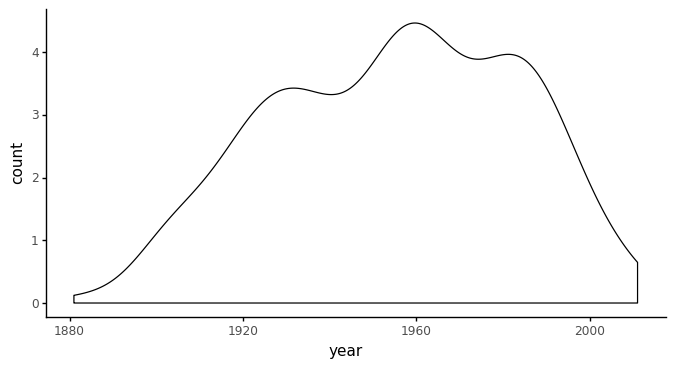

<ggplot: (8790010707049)>

In [35]:
C.metadata_density('year')

In [44]:
# C.metadata.year.plot.hist

### By gender and nationality

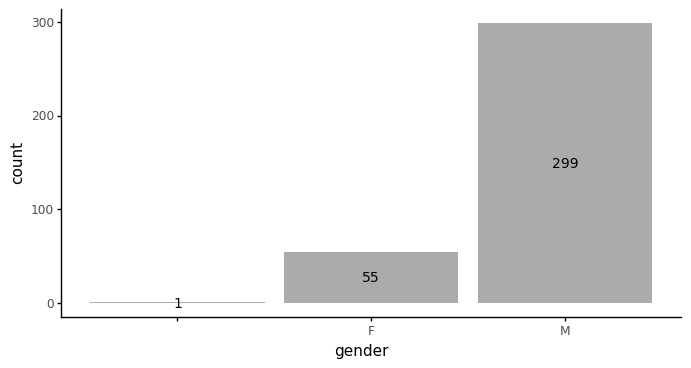

<ggplot: (8790010177785)>

In [45]:
C.metadata_barplot('gender')

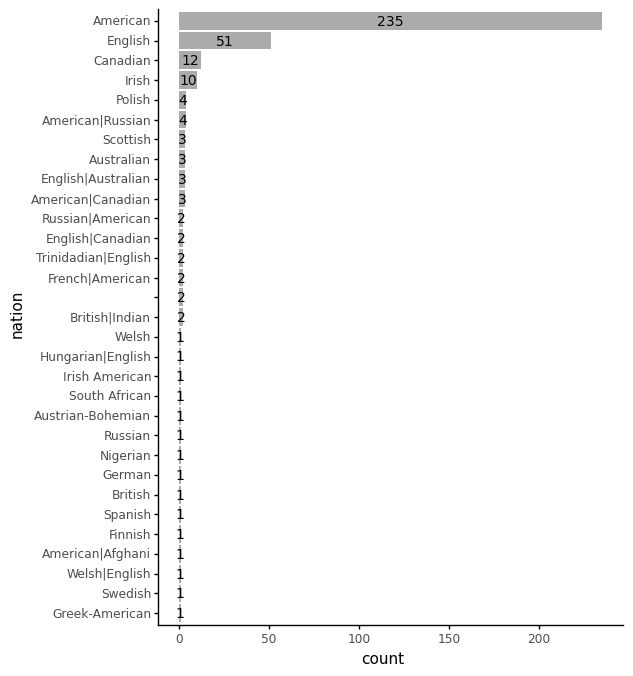

<ggplot: (8790010187569)>

In [46]:
C.metadata_barplot('nation',vertical=True,figsize=(8,6))

## Install

## Inspect

In [47]:
# Top 100 words overall, as determined by `n_agg` function over `valtype`
# Then a row for each of these 100 words in each period (`keep_periods` == True) if it's in there 
mfw_df = C.mfw_df(
    n=25000,   # limit to top N words,
    yearbin = 25, # any year delimiter. set to False for no periodizing
    n_by_period=False,    # top N per period or top N overall?
)
mfw_df

,word,count,fpm,rank,ranks_avg
0,the,483873.5,53722.021439,1,1.0
1,and,289073.5,28393.976539,2,2.0
2,to,230096.5,25098.578330,3,3.0
3,of,231485.0,23693.885720,4,4.0
4,a,204226.0,22781.359241,5,5.0
...,...,...,...,...,...
24995,reduces,3.0,0.740935,24996,33604.5
24996,expire,6.5,0.740935,24997,30302.0
24997,curvature,1.5,0.740935,24998,32695.5
24998,rigorously,5.5,0.740935,24999,31506.5


In [34]:
mfw_words = list(mfw_df.word)
len(mfw_words)

25000

In [17]:
# Use different periods on the fly
C.mfw_df(n=100,keep_periods=True,yearbin=10)

,period,word,count,fpm,rank
0,1880-1890,the,15422,38792.897444,1
1,1880-1890,to,13135,33040.118527,2
2,1880-1890,of,11297,28416.765816,3
3,1880-1890,a,9287,23360.759860,4
4,1880-1890,she,9127,22958.291724,5
...,...,...,...,...,...
1389,2010-2020,than,192,698.890875,171
1390,2010-2020,come,189,687.970705,175
1391,2010-2020,little,169,615.169572,190
1392,2010-2020,man,168,611.529515,191


In [18]:
# Top 100 words overall, as determined by `n_agg` function over `valtype`
# These scores returned (`keep_periods` == False)
C.mfw_df(n=100,keep_periods=False)

,word,count,fpm,rank,ranks_avg
0,the,483873.5,53722.021439,1,1.0
1,and,289073.5,28393.976539,2,2.0
2,to,230096.5,25098.578330,3,3.0
3,of,231485.0,23693.885720,4,4.0
4,a,204226.0,22781.359241,5,5.0
...,...,...,...,...,...
95,after,11601.5,1202.988097,96,96.0
96,two,10045.5,1197.284808,97,95.5
97,even,9876.0,1176.982301,98,109.0
98,than,11390.0,1171.341387,99,101.5


In [19]:
# Get value for a word over time
C.mfw_df(keep_periods=True).query('word == "isabel"')

,period,word,count,fpm,rank
47,1875-1900,isabel,1345,2491.511264,48
17422,1900-1925,isabel,219,33.949204,2403
61432,1925-1950,isabel,10,0.851535,27118
87874,1950-1975,isabel,13,0.875729,30617
91642,1975-2000,isabel,601,36.354895,2296
122607,2000-2025,isabel,9,6.259415,9112


In [20]:
# Change yearbin if you want
C.mfw_df(yearbin=100, keep_periods=True).query('word == "isabel"')

,period,word,count,fpm,rank
49,1800-1900,isabel,1477,2704.766579,50
19522,1900-2000,isabel,856,17.330723,4098
48803,2000-2100,isabel,9,6.298419,8881


In [21]:
# Get all words and their counts for whole corpus
C.mfw_df(yearbin=False, n=None, keep_periods=True)

,period,word,count,fpm,z,rank
0,all,the,2792721,54367.938580,424.329577,1
1,all,and,1506420,29326.577927,228.880193,2
2,all,to,1283971,24996.000842,195.079768,3
3,all,of,1221349,23776.892649,185.564553,4
4,all,a,1161334,22608.536829,176.445462,5
...,...,...,...,...,...,...
500966,all,boot-buckles,1,0.019468,-0.015428,500967
500967,all,door—forever,1,0.019468,-0.015428,500968
500968,all,engin-dear,1,0.019468,-0.015428,500969
500969,all,hijackings,1,0.019468,-0.015428,500970


In [22]:
# plot overall top 10 words over the separate periods, where a period is a decade
fig=p9.ggplot(
    p9.aes(x='period',y='fpm',color='word'),
    data=C.mfw_df(n=10, keep_periods=True, excl_stopwords=True, excl_top=100)
)
fig+=p9.geom_point()
fig+=p9.geom_line(p9.aes(group='word'))
fig

NameError: name 'p9' is not defined

### Document-Term Matrix (DTM)

In [ ]:
# Build a document term matrix with the top n words (defaults to 25000)
C.preprocess_dtm(num_proc=4)

In [ ]:
# Load dtm with top n words (defaults to 25000)
C.dtm()

In [ ]:
# !rm -r /home/ryan/lltk_data/corpora/artfl/data

In [ ]:
C.dtm(tf=True)

In [ ]:
dtm_tfidf = C.dtm(tf=True)
dtm_tfidf

In [ ]:
dtm_tfidf.loc['Hemingway,_Ernest.A_Farewell_to_Arms'].sort_values(ascending=False).head(25)